# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid=423160d06ea84b634174ef9038841d0f&units={units}&q="

city_data=[]
name=[]
cloudness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

print("Begining Data Retrieval")
print("---------------------------------------------------")
  
i=1
for city in cities:
        try:
            response = requests.get(query_url + city).json()
            if response['cod'] == 200:
                print("Processing Record " + str(i) + " of Set 1 | " + city)
                #city_data.append(response)
                name.append(response['name'])
                cloudness.append(response["clouds"]["all"])
                country.append(response['sys']['country'])
                date.append(response['sys']['sunrise'])
                humidity.append(response['main']['humidity'])
                lat.append(response['coord']['lat'])
                lng.append(response['coord']['lon'])
                wind_speed.append(response['wind']['speed'])
                max_temp.append(response['main']['temp_max'])
            else:
                print(f"City not found,skipping...")
        except:
            print(f"{response} Exception...")

        i=i+1

Begining Data Retrieval
---------------------------------------------------
Processing Record 1 of Set 1 | fernley
Processing Record 2 of Set 1 | vanimo
Processing Record 3 of Set 1 | siparia
Processing Record 4 of Set 1 | krasnyy oktyabr
City not found,skipping...
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | coihaique
Processing Record 9 of Set 1 | kununurra
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | tuatapere
City not found,skipping...
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | sinnamary
Processing Record 18 of Set 1 | anloga
Processing Record 19 of Set 1 | doembang nangbuat
Processing Record 20 of Set 1 | ixtapa
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | mecca
Processing Record 23 of Set 1 | bilibino
Processing Re

Processing Record 202 of Set 1 | naze
Processing Record 203 of Set 1 | tlacotepec
Processing Record 204 of Set 1 | vao
Processing Record 205 of Set 1 | bayan
Processing Record 206 of Set 1 | awallan
Processing Record 207 of Set 1 | nouadhibou
Processing Record 208 of Set 1 | harper
Processing Record 209 of Set 1 | myitkyina
Processing Record 210 of Set 1 | marsh harbour
Processing Record 211 of Set 1 | huarmey
Processing Record 212 of Set 1 | synya
Processing Record 213 of Set 1 | ust-nera
Processing Record 214 of Set 1 | puerto colombia
Processing Record 215 of Set 1 | colares
Processing Record 216 of Set 1 | coahuayana
Processing Record 217 of Set 1 | wad rawah
Processing Record 218 of Set 1 | chandler
Processing Record 219 of Set 1 | vila velha
Processing Record 220 of Set 1 | port-gentil
City not found,skipping...
Processing Record 222 of Set 1 | lurgan
Processing Record 223 of Set 1 | cascais
Processing Record 224 of Set 1 | ponta do sol
Processing Record 225 of Set 1 | grindavik


Processing Record 403 of Set 1 | koumac
Processing Record 404 of Set 1 | linden
Processing Record 405 of Set 1 | asnaes
Processing Record 406 of Set 1 | la asuncion
Processing Record 407 of Set 1 | cedar city
Processing Record 408 of Set 1 | mbanza-ngungu
Processing Record 409 of Set 1 | cowra
Processing Record 410 of Set 1 | campbellsville
Processing Record 411 of Set 1 | alta floresta
Processing Record 412 of Set 1 | jabinyanah
City not found,skipping...
Processing Record 414 of Set 1 | malanje
Processing Record 415 of Set 1 | srednekolymsk
Processing Record 416 of Set 1 | verkhniy landekh
Processing Record 417 of Set 1 | aras
Processing Record 418 of Set 1 | catabola
Processing Record 419 of Set 1 | nador
Processing Record 420 of Set 1 | bocaiuva
Processing Record 421 of Set 1 | batagay-alyta
Processing Record 422 of Set 1 | ganzhou
Processing Record 423 of Set 1 | pulandian
Processing Record 424 of Set 1 | prince george
Processing Record 425 of Set 1 | novikovo
Processing Record 42

Processing Record 604 of Set 1 | oranjemund
Processing Record 605 of Set 1 | denpasar
Processing Record 606 of Set 1 | los llanos de aridane
Processing Record 607 of Set 1 | constantine
Processing Record 608 of Set 1 | chara
Processing Record 609 of Set 1 | zhezkazgan
Processing Record 610 of Set 1 | anadyr
Processing Record 611 of Set 1 | sungaipenuh
City not found,skipping...
Processing Record 613 of Set 1 | gelemso
Processing Record 614 of Set 1 | sibu


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#city_data_df=pd.DataFrame(city_data)

city_data_df = pd.DataFrame(
    {'City': name,
     'Cloudiness': cloudness,
     'Country': country,
     'Date': date,
     'Humidity': humidity,
     'Lat': lat,
     'Lng': lng,
     'Max Temp': max_temp,
     'Wind Speed': wind_speed
    })

city_data_df.to_csv("city_data.csv",index=True)
city_data_df.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

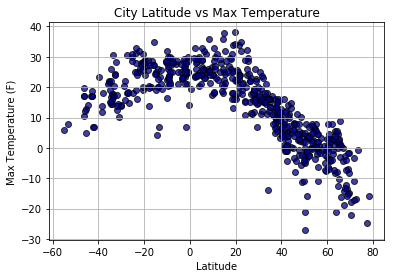

In [10]:
plt.scatter(lat, max_temp  , marker="o", facecolors="darkblue", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("CityLat_vs_maxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

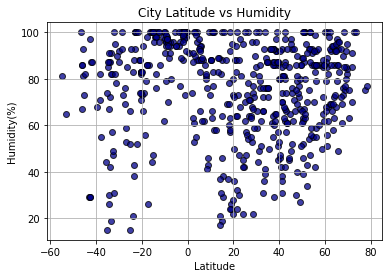

In [11]:
plt.scatter(lat, humidity  , marker="o", facecolors="darkblue", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.savefig("CityLat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

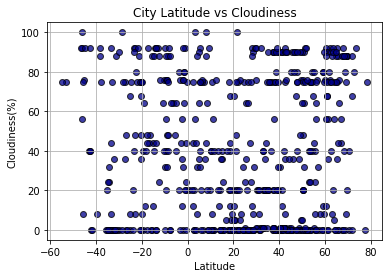

In [14]:
plt.scatter(lat, cloudness , marker="o", facecolors="darkblue", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.savefig("CityLat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

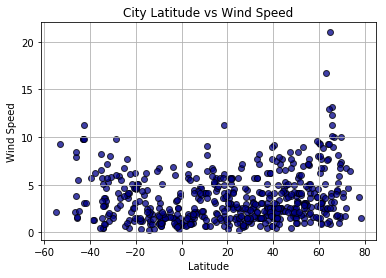

In [13]:
plt.scatter(lat, wind_speed , marker="o", facecolors="darkblue", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("CityLat_vs_windspeed.png")
plt.show()

### Analysis

#### Observed Trend 1:  City closed to equatorial region has the higest temperature
#### Observed Trend 2:  City closed to Poles have higher relative humidity
#### Observed Trend 3:  City Cloudness is similar along the different Latitude
#### Observed Trend 4:  City Wind Speed is also similar along the different Latitude